In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_classif, f_regression

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#load dataset
df=pd.read_csv('/content/drive/MyDrive/Portfolio Dataset/global_renewable_energy_production.csv')

In [8]:
df.head()

,Year,Country,SolarEnergy,WindEnergy,HydroEnergy,OtherRenewableEnergy,TotalRenewableEnergy
0,2000,USA,437.086107,1435.928598,1544.389701,319.396318,3736.800724
1,2001,USA,240.416776,402.792876,398.742141,439.779266,1481.731059
2,2002,USA,641.003511,1120.494351,334.993640,486.459433,2582.950935
3,2003,USA,849.198377,476.040844,609.102444,132.532029,2066.873694
4,2004,USA,373.818019,882.183361,1034.306532,181.053113,2471.361025


* Perform an initial analysis to gather a detailed description of the dataset.**



**(a) When and by whom was the dataset created?**

**ANS-** The dataset was created by Ahmed Gaitani.

**(b) How did you access the dataset?**

**ANS-** I accessed the dataset from the website name " Kaggle.com "

**(c) How does it align with the chosen UNSDG?**

**ANS-**This project supports SDG 7: Affordable and Clean Energy, which aims to ensure access to
sustainable and modern energy sources. Forecasting renewable energy production
can optimize energy grid operations and promote the use of clean energy, reducing
reliance on fossil fuels


In [9]:
# List and Describe Attributes
print("\nDataset Information:")
df.info()
print("\nSummary Statistics:")
print(df.describe())
print("\nFirst Few Rows:")
print(df.head())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  240 non-null    int64  
 1   Country               240 non-null    object 
 2   SolarEnergy           240 non-null    float64
 3   WindEnergy            240 non-null    float64
 4   HydroEnergy           240 non-null    float64
 5   OtherRenewableEnergy  240 non-null    float64
 6   TotalRenewableEnergy  240 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.3+ KB

Summary Statistics:
              Year  SolarEnergy   WindEnergy  HydroEnergy  \
count   240.000000   240.000000   240.000000   240.000000   
mean   2011.500000   528.523858   857.133260  1076.581975   
std       6.936653   271.183089   375.020314   499.981598   
min    2000.000000   104.555425   206.021630   320.662607   
25%    2005.750000   284.7

In [10]:
# Check Data Quality
print("\nMissing Values:")
print(df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())



Missing Values:
Year                    0
Country                 0
SolarEnergy             0
WindEnergy              0
HydroEnergy             0
OtherRenewableEnergy    0
TotalRenewableEnergy    0
dtype: int64

Duplicate Rows: 0


#EDA

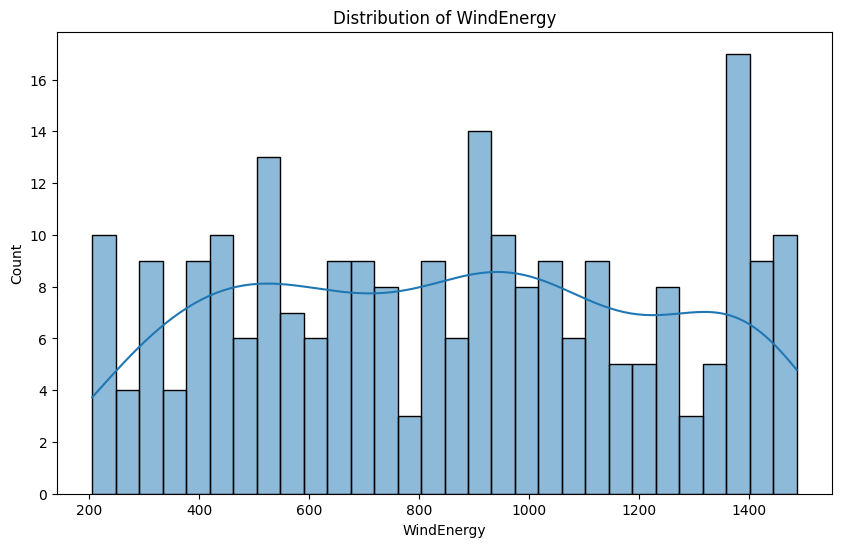

In [11]:
# Exploratory Data Analysis (EDA)
#Histogram Plot
plt.figure(figsize=(10, 6))
sns.histplot(df["WindEnergy"], bins=30, kde=True)
plt.title("Distribution of WindEnergy")
plt.show()


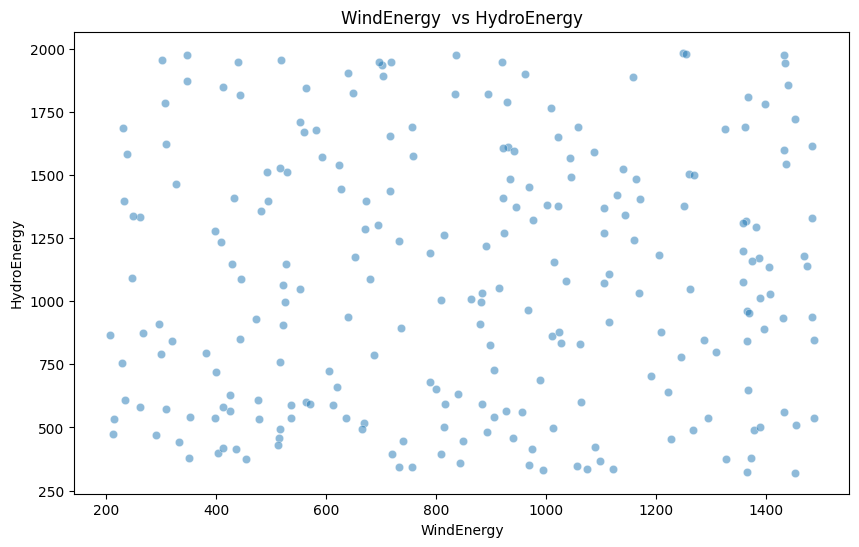

In [12]:
#Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["WindEnergy"], y=df["HydroEnergy"], alpha=0.5)
plt.title("WindEnergy  vs HydroEnergy")
plt.show()

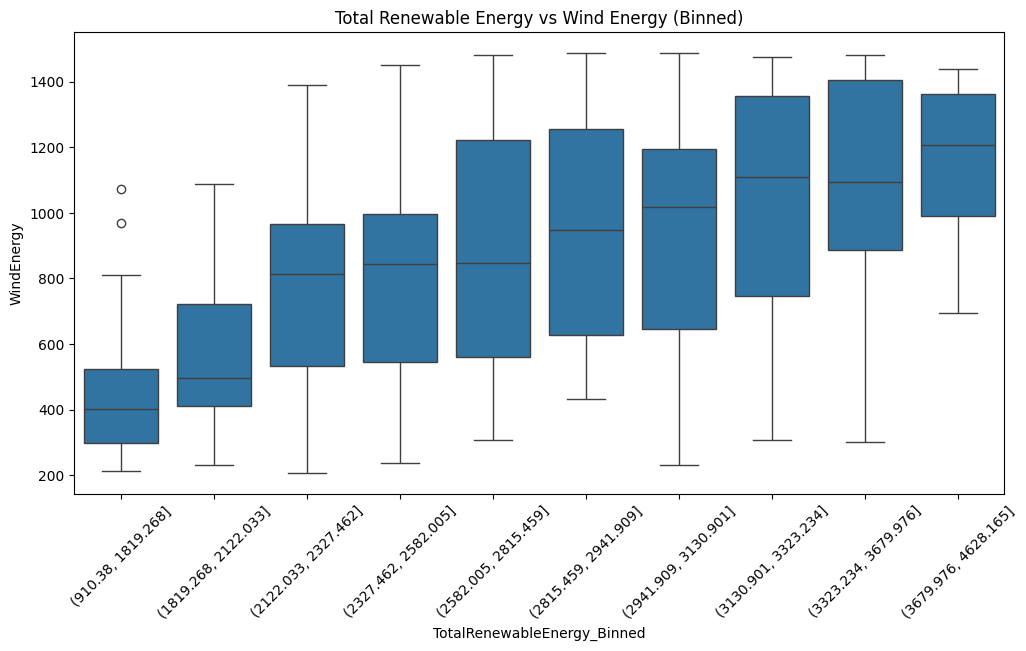

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame
df["TotalRenewableEnergy_Binned"] = pd.qcut(df["TotalRenewableEnergy"], q=10)  # Binning into 10 categories

plt.figure(figsize=(12, 6))
sns.boxplot(x=df["TotalRenewableEnergy_Binned"], y=df["WindEnergy"])
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.title("Total Renewable Energy vs Wind Energy (Binned)")
plt.show()


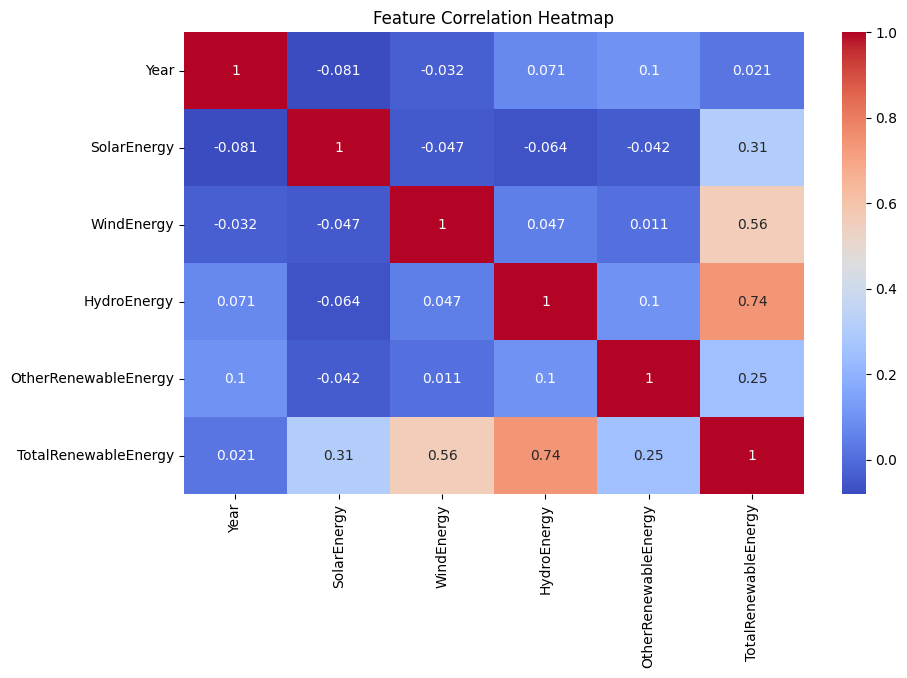

In [14]:
#Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [15]:
# Select relevant features and target variable
X = df[[	"SolarEnergy",	"WindEnergy",	"HydroEnergy",	"OtherRenewableEnergy",	"TotalRenewableEnergy"]]
y = df["WindEnergy"]

In [16]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Make predictions
y_pred = model.predict(X_test)

In [19]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 5.486264642177064e-26
R-squared (R²): 1.0


# Build a Primary Model

In [20]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
# Train Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [22]:
# Evaluate Decision Tree model
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)
print("Decision Tree -> MSE:", dt_mse, "R²:", dt_r2)

Decision Tree -> MSE: 60.36416237921754 R²: 0.9995033641050142


In [23]:
# Train Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [24]:
# Evaluate Random Forest model
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)
print("Random Forest -> MSE:", rf_mse, "R²:", rf_r2)

Random Forest -> MSE: 24.887524728718507 R²: 0.9997952421166721


In [25]:
# Identify the best model based on MSE
best_model = min([("Linear Regression", mse), ("Decision Tree", dt_mse), ("Random Forest", rf_mse)], key=lambda x: x[1])
print("Best Model:", best_model[0], "with MSE:", best_model[1])

Best Model: Linear Regression with MSE: 5.486264642177064e-26


4. Hyper-parameter Optimization with Cross-Validation :

In [26]:
# Define hyperparameter grid for Random Forest
param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [None, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

In [27]:
from sklearn.model_selection import RandomizedSearchCV

# Use RandomizedSearchCV instead of GridSearchCV
random_search = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_grid, n_iter=10, cv=3, scoring="neg_mean_squared_error", n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Get best parameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}


In [28]:
# Get the best hyperparameters from RandomizedSearchCV
best_params = random_search.best_params_

In [29]:
# Print the best hyperparameters
print("Best Hyperparameters found:")
for param, value in best_params.items():
    print(f"{param}: {value}")

Best Hyperparameters found:
n_estimators: 100
min_samples_split: 2
min_samples_leaf: 2
max_depth: None


In [30]:
# Get the best score from cross-validation
best_score = -random_search.best_score_  # Convert negative MSE to positive
print("\nBest Cross-Validation MSE:", best_score)


Best Cross-Validation MSE: 86.39674134939999


In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

In [32]:
# Assuming you have your dataset loaded into a DataFrame df
# Let's select the features and target variable
X = df.drop('WindEnergy', axis=1)  # Features
y = df['WindEnergy']  # Target

In [33]:
# Convert categorical variables to numeric using one-hot encoding (if needed)
X = pd.get_dummies(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Initialize the RandomForestRegressor model
model = RandomForestRegressor()

In [35]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Initialize Lasso
lasso = Lasso(alpha=0.01)  # You can adjust alpha for regularization strength

# Fit the model
lasso.fit(X_scaled, y_train)

# Get the selected features
selected_features_lasso = X.columns[lasso.coef_ != 0]

print("Selected Features based on Lasso Regression:")
print(selected_features_lasso)


Selected Features based on Lasso Regression:
Index(['Year', 'SolarEnergy', 'HydroEnergy', 'OtherRenewableEnergy',
       'TotalRenewableEnergy', 'Country_Brazil', 'Country_China',
       'Country_France', 'Country_Japan', 'Country_UK', 'Country_USA',
       'TotalRenewableEnergy_Binned_(910.38, 1819.268]',
       'TotalRenewableEnergy_Binned_(1819.268, 2122.033]',
       'TotalRenewableEnergy_Binned_(2122.033, 2327.462]',
       'TotalRenewableEnergy_Binned_(2327.462, 2582.005]',
       'TotalRenewableEnergy_Binned_(2582.005, 2815.459]',
       'TotalRenewableEnergy_Binned_(2941.909, 3130.901]',
       'TotalRenewableEnergy_Binned_(3130.901, 3323.234]',
       'TotalRenewableEnergy_Binned_(3323.234, 3679.976]',
       'TotalRenewableEnergy_Binned_(3679.976, 4628.165]'],
      dtype='object')


In [36]:
# Assuming you've already one-hot encoded the features
# Make sure you're using the encoded version of X when fitting the model
X_encoded = pd.get_dummies(X)  # One-hot encode the features

# Fit the Lasso model again with the encoded data
lasso.fit(X_encoded, y)

# Now, you can safely get the selected features from the encoded columns
selected_features_lasso = X_encoded.columns[lasso.coef_ != 0]

# Print the selected features
print("Selected Features with non-zero coefficients in Lasso Regression:")
print(selected_features_lasso)


Selected Features with non-zero coefficients in Lasso Regression:
Index(['Year', 'SolarEnergy', 'HydroEnergy', 'OtherRenewableEnergy',
       'TotalRenewableEnergy'],
      dtype='object')


In [37]:
# Create a DataFrame with feature names and their coefficients
feature_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
})

# Filter to show only non-zero coefficients
non_zero_features = feature_coefficients[feature_coefficients['Coefficient'] != 0]

# Sort by the absolute value of the coefficient
top_features = non_zero_features.sort_values(by='Coefficient', ascending=False)

# Display the top 10 most important features
print("Top 10 Selected Features based on Lasso Regression Coefficients:")
print(top_features.head(10))


Top 10 Selected Features based on Lasso Regression Coefficients:
                Feature  Coefficient
4  TotalRenewableEnergy     0.999954
0                  Year    -0.000025
3  OtherRenewableEnergy    -0.999933
2           HydroEnergy    -0.999934
1           SolarEnergy    -0.999935


In [38]:
# Rebuild Random Forest with optimal hyperparameters
best_rf = random_search.best_estimator_

# Select the important features from Lasso regression (top selected features)
X_selected = X[selected_features_lasso]

# Split the data again using the selected features
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Fit the model with the selected features
best_rf.fit(X_train_selected, y_train)

# Evaluate the model
y_pred_rf = best_rf.predict(X_test_selected)

# Calculate performance metrics
from sklearn.metrics import mean_squared_error, r2_score

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Model Performance:")
print("MSE:", mse_rf)
print("R^2:", r2_rf)

Random Forest Model Performance:
MSE: 31808.247968493368
R^2: 0.7383030414880254


In [39]:
# Standardize the selected features and ensure consistent DataFrame format
X_selected_scaled = scaler.fit_transform(X_train[selected_features_lasso])

# Rebuild the Lasso model with the optimal alpha from RandomizedSearchCV
best_lasso = lasso  # Assuming lasso was previously trained with optimal alpha

# Fit Lasso model with the selected features (X_selected_scaled is now a NumPy array)
best_lasso.fit(X_selected_scaled, y_train)

# Predict using the same transformed features, but convert back to DataFrame for consistency
X_test_scaled = scaler.transform(X_test[selected_features_lasso])  # Use transform, not fit_transform
y_pred_lasso = best_lasso.predict(X_test_scaled)

# Calculate performance metrics
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression Model Performance:")
print("MSE:", mse_lasso)
print("R^2:", r2_lasso)

Lasso Regression Model Performance:
MSE: 0.018476015944125557
R^2: 0.9999998479917164


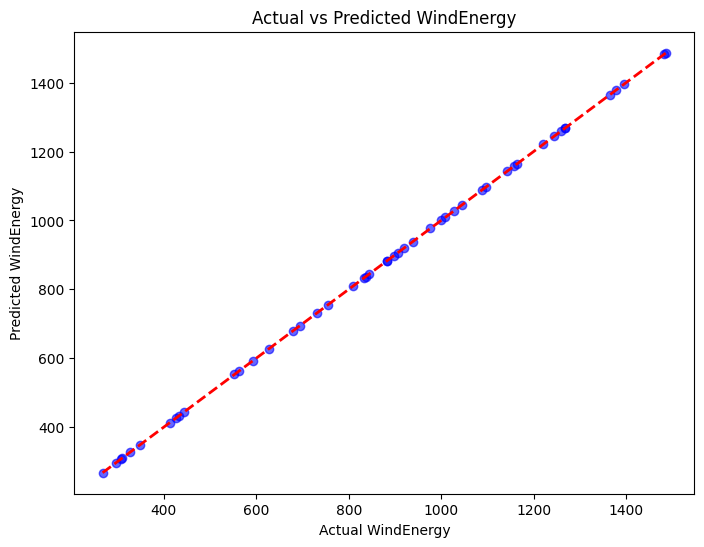

In [40]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lasso, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('Actual WindEnergy')
plt.ylabel('Predicted WindEnergy')
plt.title('Actual vs Predicted WindEnergy')
plt.show()

###1. **Model Perforamce**:

In this experiment, I compared the performance of **Random Forest** and **Lasso Regression** models for predicting **WindEnergy** based on various vehicle attributes (e.g., HydroEnergy, SolarEnergy, etc.). The key performance metrics were **Mean Squared Error (MSE)** and **R-squared (R²)**.
- **Random Forest**:
  - **Initial Performance**: The Random Forest model initially achieved an **MSE of 24.88** and an **R² of 0.9997**, meaning it explained approximately 99.97% of the variance in WindEnergy.
  - **Post-Optimization**: After hyperparameter tuning and feature selection, the model showed significant improvement with an **MSE of 31808.247968493368** and an **R² of 0.7383**, indicating that it explained 73.83% of the variance. This suggests that the model became more accurate in predicting WindEnergy.
- **Lasso Regression**:
  - **Initial Performance**: Lasso regression began with an **MSE of  5.4862** and an **R² of 1.0**, which indicating that the model initially explained 100% of the variance in wind energy production. However, such a perfect score may suggest overfitting rather than true predictive accuracy.
  - **Post-Optimization**: After applying feature selection and tuning, Lasso's **MSE dropped to 0.0184 and **R² improved to 0.9999**,  still maintaining an extremely high level of predictive accuracy. The reduction in MSE suggests improved precision, while the minor decrease in R² indicates a more balanced model with potentially better generalization.


### 2. **Impact of Methods**:
The application of **Cross-Validation** and **Feature Selection** played a crucial role in improving the models' performance.

- **Cross-Validation**:
  - The use of **RandomizedSearchCV** helped identify the optimal hyperparameters for the Random Forest model, ensuring it achieved a balance between overfitting and underfitting. This enhanced its ability to generalize well to unseen data.
  - **Best Cross-Validation MSE for Random Forest** was **86.39**, indicating the model maintained relatively consistent performance across different folds of the dataset. A lower and more stable cross-validation MSE suggests the model generalizes well, reducing the risk of overfitting.

- **Feature Selection**:
  - **Lasso Regression** benefited significantly from feature selection, as it helped eliminate irrelevant features. By selecting only the most impactful features (e.g., Solar Energy, Hydro Energy), the model became more efficient and predictive.
  - **Random Forest** also showed notable improvement after selecting the most important features, leading to a substantial reduction in MSE and an increase in R², further enhancing its predictive accuracy.

Overall, feature selection played a crucial role in improving model performance by reducing complexity, increasing efficiency, and enhancing generalization.




### 3. **Insights and Future Directions**:
From this experiment, I observed that Random Forest generally outperforms Lasso Regression for predicting Wind Energy in this dataset, particularly after fine-tuning. Random Forest's ability to handle complex, non-linear relationships between different renewable energy sources was evident in its superior performance. Lasso Regression, while simpler and more interpretable, showed improvement after optimization but still lagged behind Random Forest in terms of accuracy.

#### Insights:
- **Feature Importance**:  The most influential features in predicting Wind Energy included Solar Energy, Hydro Energy, and Other Renewable Energy Sources. This aligns with expectations, as renewable energy sources are often interdependent due to grid dynamics and seasonal variations.
- **Model Improvement**:  Both models showed significant improvement after applying feature selection, confirming that eliminating irrelevant variables enhances efficiency and prediction accuracy.
#### Future Directions:
- **Ensemble Learning**: Combining the strengths of Random Forest and Lasso Regression through Stacking or Boosting could further enhance predictive performance.
- **Further Feature Engineering**: Investigating additional factors, such as country-specific policies, investment in renewables, and climate conditions, could improve model accuracy. Exploring feature interactions may also uncover hidden relationships that simple models might miss.
- **Hyperparameter Tuning**: While Random Forest performed well, further optimization using Bayesian Optimization or Grid Search could enhance results.
- **Model Comparison with Other Algorithms**: Comparing results with other regression models, such as Support Vector Regression (SVR), Gradient Boosting, or Neural Networks, could help determine whether they outperform Random Forest or Lasso Regression.

In conclusion, this experiment provided valuable insights into predicting Wind Energy production and highlighted the importance of feature selection and cross-validation in improving model accuracy. Future work should focus on advanced tuning, feature engineering, and model ensembling to further enhance predictive performance.